<a href="https://colab.research.google.com/github/macorony/Machine_Learning_Basics/blob/main/Model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# predefined dataset
from sklearn import datasets
# preprocessing
from sklearn.model_selection import train_test_split
# models
from sklearn.linear_model import LinearRegression
# evaluation
from sklearn.metrics import roc_curve, roc_auc_score, mean_absolute_error, mean_squared_error

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,-0.000005,0.001147,-0.001283,-0.000948,-0.000742,-0.001098,-0.000172,0.000579,-0.000101,0.000111
std,0.048192,0.047696,0.048700,0.047401,0.047406,0.047435,0.047890,0.048596,0.049075,0.049977
min,-0.107226,-0.044642,-0.090275,-0.112400,-0.108893,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767
25%,-0.038207,-0.044642,-0.036385,-0.036656,-0.034592,-0.030906,-0.034197,-0.039493,-0.033249,-0.034215
50%,0.005383,-0.044642,-0.008362,-0.005671,-0.004321,-0.004759,-0.006584,-0.002592,-0.004220,-0.001078
75%,0.038076,0.050680,0.030440,0.032201,0.025262,0.024521,0.026550,0.034309,0.030880,0.029988
max,0.110727,0.050680,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612


# EDA

In [6]:
X_train.shape[1]

10

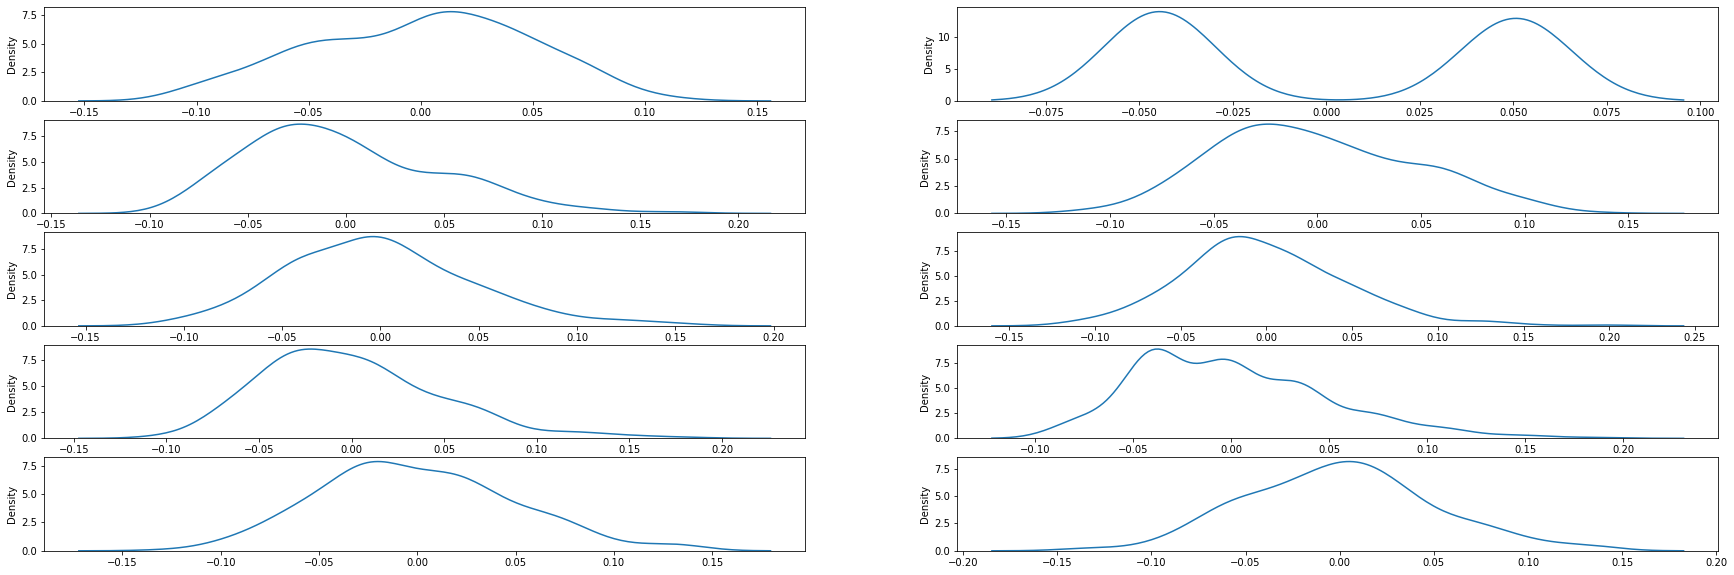

In [7]:
fig, axes = plt.subplots(5,2, figsize=(30, 10))
axes = axes.ravel()
for i in range(X_train.shape[1]):
  sns.kdeplot(X_train[:, i], label=f'{i}th feature', ax=axes[i])


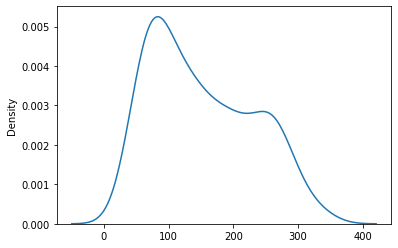

In [8]:
sns.kdeplot(y_train)

# Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

**Coefficient of Determination**
> The number between 0 and 1 measuring how well a statistical model predicts an outcome. 

> An online post to explain [coefficient of determination](https://www.scribbr.com/statistics/coefficient-of-determination/#:~:text=What%20is%20the%20definition%20of,predicted%20by%20the%20statistical%20model.) 


In [11]:
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_test, y_test))

[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]
153.06798218266258
0.35940090989715534


In [12]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

3180.1988368427274
45.120987683251016


In [13]:
len(X_test)
np.arange(1, 112)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111])

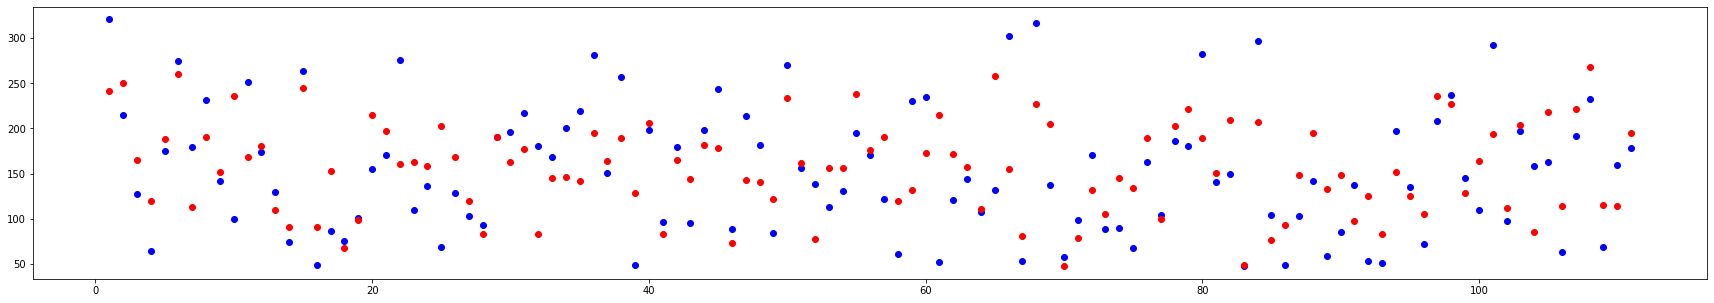

In [14]:
plt.figure(figsize=(30, 5))
plt.scatter(np.arange(1,len(X_test)+1), y_test, color='blue')
plt.scatter(np.arange(1,len(X_test)+1), y_pred, color='red')
plt.show()

# K-Nearest Neighbors
1. The intuition of KNN is that similar things exist in close proximity.
2. The similarity is measured by distance (minkowski distance)
3. The algorithm is simple to implement. it is model independent but assumption dependent. 
4. Not fit to large data size training because its inability to handle too many features. 
5. Two application of KNN: Recommendation system, KNN-search. 
6. KNN is baseline model to try before more advanced models.

A KNN implementation from scratch

In [17]:
from collections import Counter
import math

In [33]:
def knn_scratch(data, query, k, distance_fn, choice_fn):
  neighbor_distances_and_indices = []

  for index, example in enumerate(data):
    distance = distance_fn(example[:-1], query)
    neighbor_distances_and_indices.append((distance, index))
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]
    return k_nearest_distances_and_indices, choice_fn(k_nearest_labels)

def mean(labels):
  return sum(labels) / len(labels)

def mode(labels):
  return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
  sum_squared_distance = 0
  for i in range(len(point1)):
    sum_squared_distance += math.pow(point1[i] - point2[i], 2)
  return math.sqrt(sum_squared_distance)



In [38]:
reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
]
query = [60]

## Training KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors

In [44]:
reg_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=None)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [50]:
# the distance metric used
print(reg_knn.effective_metric_)
# additional keyword arguments for the metric function
print(reg_knn.effective_metric_params_)
# how many feature as input
print(reg_knn.n_features_in_)
# sample size
print(reg_knn.n_samples_fit_)

euclidean
{}
10
331


In [55]:
# model parameters
reg_knn.get_params()

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [70]:
# find the K-neighbors of a point
reg_knn.kneighbors([[-0.04910502, -0.04464164, -0.05686312, -0.04354219, -0.04559945, -0.04327577,  0.00077881, -0.03949338, -0.01190068,  0.01549073]])

(array([[8.35496391e-09, 6.18265965e-02, 7.29174783e-02, 7.74510944e-02,
         7.76567321e-02]]), array([[  0,  44, 306,  83, 231]]))

In [75]:
# compute the graph of k_neighbors for points in X
neigh_points = reg_knn.kneighbors_graph([[-0.04910502, -0.04464164, -0.05686312, -0.04354219, -0.04559945, -0.04327577,  0.00077881, -0.03949338, -0.01190068,  0.01549073]])
neigh_points.toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [78]:
# coefficient of determination of prediction
reg_knn.score(X_test, y_test)

0.18912404854026388

Evaluate number of neighbors on model performance

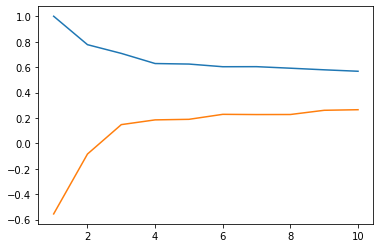

In [81]:
train_accuracy = []
test_accuracy = []
n_neighbor = range(1, 11)

for n in n_neighbor:
  reg_knn = KNeighborsRegressor(n_neighbors=n)
  reg_knn.fit(X_train, y_train)
  train_accuracy.append(reg_knn.score(X_train, y_train))
  test_accuracy.append(reg_knn.score(X_test, y_test))

plt.plot(n_neighbor, train_accuracy, label='training accuracy')
plt.plot(n_neighbor, test_accuracy, label='test accuracy')
plt.show()

In [82]:
from sklearn.datasets import make_moons

(array([[ 0.11289945, -0.28228413],
        [ 1.19135178,  0.20724497],
        [ 0.78346923, -0.18742052],
        [-0.91033551,  0.34515246],
        [ 0.56684696,  0.91576993],
        [ 0.06669477,  0.91727985],
        [ 0.71349903, -0.44535147],
        [-0.42847112,  0.34792071],
        [ 1.13671797,  0.77920298],
        [-0.05852512,  0.90582094],
        [ 0.50992689, -0.60334597],
        [ 0.81997554, -0.19345152],
        [-0.86819845,  0.4921041 ],
        [ 1.10447266, -0.84982889],
        [ 0.2599289 ,  0.51921273],
        [ 0.43880114,  0.95944139],
        [-1.09037102, -0.0470429 ],
        [-1.11655218,  0.90973417],
        [-0.34071897, -0.14966927],
        [ 0.26533128, -0.79421595],
        [ 0.56759618,  1.11707318],
        [ 1.12744257, -0.81170984],
        [-0.77614589,  0.36406896],
        [ 0.66307635, -0.80934665],
        [ 0.08355628,  1.03429207],
        [-0.36885359,  0.0303598 ],
        [-0.95939393,  0.24289172],
        [-0.66557479,  0.742